# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

#### Описание данных таблицы
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

## Откройте файл с данными и изучите общую информацию

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Прочтение файлов

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### Изучение файла

In [3]:
#Вывод первых 10 строк датафрейма
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
#Вывод общей информации по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

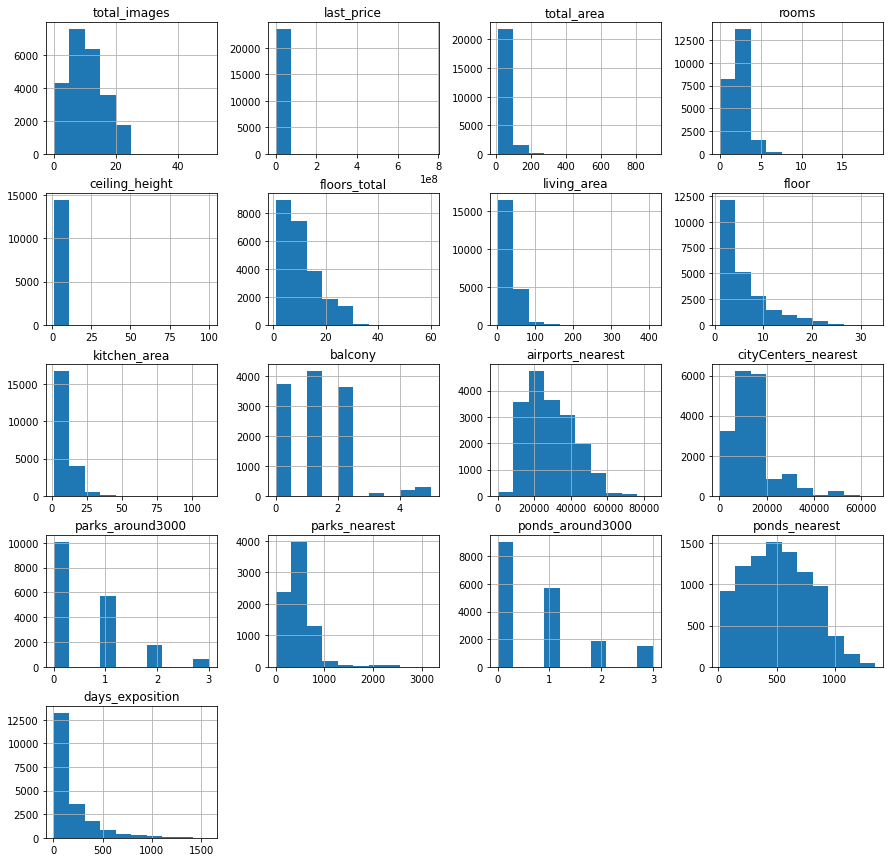

In [5]:
#Построение гистограммы
df.hist(figsize=(15,15));

Всего в таблице 23699 записей. Почти во всех столбцах встречаются пустые значения. 
В некоторых столбцах указан неверный тип данных.

## Выполните предобработку данных

### Поиск пропущенных значений

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
#Необходимо изменить название стобца cityCenters_nearest на city_centers_nearest для более удобнйо работы
df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Заполнение пропусков

#### celling_height - высота потолков
Заменю пропуски на медиальное значние

In [8]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].sort_values(ascending=False).head(40)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
20264      6.0
21227      5.8
1388       5.6
7578       5.5
12628      5.3
1026       5.3
464        5.2
1053       5.0
21923      4.9
2802       4.8
1300       4.7
Name: ceiling_height, dtype: float64

In [9]:
#По значениям, которые записаны в таблице, можно сделать вывод что это похоже на явные ошибки. 
#Чтобы избавиться от этой ошибки нужно перенести все запятые на 1 знак в значениях от 20 и выше
df.loc[df['ceiling_height']>=20, 'ceiling_height'] = df['ceiling_height']/10
df['ceiling_height'].sort_values(ascending=False).head(40)

15061    14.00
22309    10.30
22869    10.00
5863      8.30
17442     8.00
15743     8.00
3474      8.00
20264     6.00
21227     5.80
1388      5.60
7578      5.50
1026      5.30
12628     5.30
464       5.20
1053      5.00
21923     4.90
2802      4.80
19142     4.70
1300      4.70
12401     4.65
6802      4.50
14519     4.50
13224     4.50
10159     4.50
2823      4.50
9783      4.50
3067      4.50
8018      4.45
7521      4.45
6728      4.40
11651     4.40
7274      4.40
4201      4.37
10754     4.30
17078     4.25
7279      4.20
11128     4.20
2843      4.20
19041     4.20
22494     4.20
Name: ceiling_height, dtype: float64

В Санкт-Петербурге в старых домах встречаются потолки выше 4 метров. Значений больше этой величины не так много, поэтому 
считаю что это не сильно скажется на итоговых расчетах.

#### floors_total - общее количество этажей в доме.
Его удобнее заменить на медиальное значение.

#### is_apartment - тип квартиры
Судя по количеству пропусков ячейки заполнены только если квартира является апартаментами. 
Все пустные значения для удобства лучше запомнить значением False и перевести в тип данных bool

In [10]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [11]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'] = df['is_apartment'].astype('bool')

#### kitchen_area - площадь кухни.
Чтобы узнать есть ли зависимость площади кухни от других значений нужно проверить её корреляцию.

In [12]:
df.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area']

kitchen_area            1.000000
total_area              0.609121
last_price              0.519869
living_area             0.428674
ceiling_height          0.299071
rooms                   0.269945
floors_total            0.163944
ponds_around3000        0.150148
floor                   0.135531
total_images            0.104756
days_exposition         0.100586
balcony                 0.098634
parks_around3000        0.087503
is_apartment            0.049034
parks_nearest           0.029641
airports_nearest        0.008200
ponds_nearest          -0.105223
city_centers_nearest   -0.190049
studio                       NaN
open_plan                    NaN
Name: kitchen_area, dtype: float64

In [13]:
df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Явной зависимости между значениями нет. Скорее всего при заполнении не указали наличие кухни или её нет вообще.
Так как столбец имеет вещественный тип данных пропуски заменим как 15% от общей площади квартиры.

In [14]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*0.15)
df['kitchen_area'].describe()

count    23699.000000
mean        10.369541
std          5.958944
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        112.000000
Name: kitchen_area, dtype: float64

#### balcony - количество балконов
Чтобы узнать есть ли зависимость количества балконов от других значений нужно проверить её корреляцию.

In [15]:
df.corr().sort_values(by='balcony', ascending=False)['balcony']

balcony                 1.000000
floors_total            0.194065
floor                   0.168773
total_images            0.121693
kitchen_area            0.088448
airports_nearest        0.066834
parks_nearest           0.052328
city_centers_nearest    0.051051
total_area              0.047937
is_apartment            0.043119
studio                  0.031455
last_price              0.029646
open_plan               0.019491
living_area             0.018849
rooms                   0.017991
ponds_nearest           0.010847
ceiling_height         -0.010558
ponds_around3000       -0.032709
days_exposition        -0.032909
parks_around3000       -0.082850
Name: balcony, dtype: float64

Явной зависимости нет. Скорее всего балконы не указали потому что их нет в квартирах. Заменим пустые значения на 0.

In [16]:
df['balcony'] = df['balcony'].fillna(0)

#### locality_name - место где находится квартира
Так как мы не знаем что должно быть заполнено на местах пустых значений, то предлагаю заполнить их как unknown

In [17]:
df['locality_name'] = df['locality_name'].fillna('unknown')
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

#### parks_around3000 - количество парков в 3км от дома
Пустые значения скорее всего указывают на то, что на этом расстоянии от дома нет парков. Предлагаю заполнить их как 0

In [18]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

#### ponds_around3000 - количество прудов в 3км от дома
Пустые значения скорее всего указывают на то, что на этом расстоянии от дома нет прудов. Предлагаю заполнить их как 0

In [19]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

### Изменение типов данных

#### last_price - цена на момент снятия квартиры с продажи. 
Считаю что этот столбец должен иметь тип данных int, потому что в таблице встречаются только целые числа.

In [20]:
df['last_price'] = df['last_price'].astype('int')

#### first_day_exposition - дата публикации.
Нужно изменить тип данных этого столбца на datetime. 

In [21]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

#### balcony - количество балконов.
Нужно изменить тип данных на int, потому что количество балконов может быть только целым числом.

In [22]:
df['balcony'] = df['balcony'].astype('int')

#### parks_around3000 - количество парков в 3км от дома
Изменю тип данных на int для более удобного отображения

In [23]:
df['parks_around3000'] = df['parks_around3000'].astype('int')

#### ponds_around3000 - количество парков в 3км от дома
Изменю тип данных на int для более удобного отображения

In [24]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

### Устранение неявных дубликатов в названиях населенных пунктов.

Перевод всех букв в строчные

In [25]:
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Замена всех буквы 'ё' на 'е'

In [26]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')
df['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

Чтобы не было дубликатов по типу 'поселок мурино' и 'мурино' необходимо оставить только названия населенных пунктов

In [27]:
df['locality_name'] = (
    df['locality_name']
    .replace(['городской поселок ', 'поселок городского типа ', 'деревня ', 'село ',
             'садовое товарищество ', 'садоводческое некоммерческое товарищество ','коттеджный поселок ',
              'поселок ', 'при железнодорожной станции ', 'пансионат ',
             'платформа'], '', regex=True))
df['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

### Вывод по предобработке данных

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

В ходе выполнения предобработки были найдены и заполнены пустные значения в следующих столбцах:

1. Сelling_height - высота потолков. Пустые значения были заполнены медиальными.
2. is_apartment - тип квартиры. Помимо пропущенных значений столбец так же содержит значения true и false. Скорее всего пустые значения указывают на то, что квартиры не являются апартаментами, значит заполним их как false.
3. kitchen_area - площадь кухни. Явной зависимости между значениями нет. Скорее всего при заполнении не указали наличие кухни или её нет вообще. Так как столбец имеет вещественный тип данных пропуски заменим как 15% от общей площади квартиры.
4. balcony - былконы. Пустные значения скорее всего не заполнили из-за того что в квартирах нет балконов. Пустые значения были заполнены нулями.
5. locality_name - место где находится квартира. Из-за того что точно неизвестно где располагается квартира было принято регение заполнить пустные значение как unknown.
6. parks_around3000 и ponds_around3000 это количество парков и пркдов сообтветственно. Скорее всего пустые значения появились из-за того что в радиусе 3 км от квартиры нет ни парков, ни прудов. Пустные значения были заполнены нулями.

Некоторые данные пришлось оставить без изменений:
1. living_area - жилая площадь. Так как жилая площадь это общая площадь квартиры без учета нежилых зон (балкона, кухни, коридора и т.п) было принято решение оставить все значения без изменений чтобы избежать искажения данных.
2. airports_nearest, city_centers_nearest, parks_nearest и ponds_nearest. Скорее всего пустые данные указывают на слишком большое удаление от того или инного места. Чтобы избежать искажения данных было принято решение оставить столбцы без изменений.
3. days_exposition - количество дней в продаже. Скорее всего пустые значения указывают на то, что квартира еще не продана, поэтому было принято решение оставить все как есть.
4. floors_total - общее количество этажей в доме. Так как пропусков очень мало (менее 1%), то они никак не повлияют на итог.

Причиной пропусков могли стать человеческий фактор или несовершенность програмной оболочки (не все поля обязательные или нет проверки введенных данных)

Также кроме заполнения пропусков были изменены типы данных в некоторых столбцах для более удобной работы с даннымии переименован столбец cityCenters_nearest в city_centers_nearest

Были устраныне неявные дубликаты в названиях населенных пунктов (locality_name).

## Добавьте в таблицу новые столбцы

### Цена одного квадратного метра

In [29]:
df['squire_meter_price'] = df['last_price']/df['total_area'].round(2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,squire_meter_price
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000


### День публикации объявления (0 - понедельник, 1 - вторник и т. д.)

In [30]:
df['publication_weekday'] = df['first_day_exposition'].dt.weekday
df['publication_weekday'].head()

0    3
1    1
2    3
3    4
4    1
Name: publication_weekday, dtype: int64

### Месяц публикации объявления

In [31]:
df['publication_monts'] = df['first_day_exposition'].dt.month
df['publication_monts'].head()

0     3
1    12
2     8
3     7
4     6
Name: publication_monts, dtype: int64

### Год публикации объявления

In [32]:
df['publication_years'] = df['first_day_exposition'].dt.year
df['publication_years'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: publication_years, dtype: int64

### Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [33]:
def floor(f):
    if f['floor'] == 1:
        return('первый')
    elif f['floor'] == f['floors_total']:
        return('последний')
    else:
        return('другой')
df['floor_type'] = df.apply(floor, axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,squire_meter_price,publication_weekday,publication_monts,publication_years,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой


### Расстояние до центра города в километрах

In [34]:
df['center_distance'] = (df['city_centers_nearest'] / 1000).round(0)
df['center_distance'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: center_distance, dtype: float64

## Проведите исследовательский анализ данных

In [35]:
q1 = df['last_price'].quantile(.25) 
q3 = df['last_price'].quantile(.75)
iqr = q3 - q1 
df = df[((df['last_price'] > (q1 - 1.5 * iqr)) & (df['last_price'] < (q3 + 1.5 * iqr)))]

### Изучение и описание зависимостей количества квартир от разных параметров

#### Общая площадь квартир

In [36]:
df['total_area'].describe()

count    21638.000000
mean        53.262692
std         19.059902
min         12.000000
25%         39.000000
50%         49.200000
75%         63.500000
max        230.000000
Name: total_area, dtype: float64

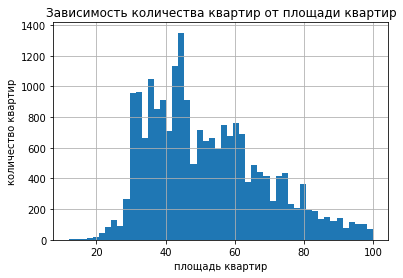

In [37]:
df['total_area'].hist(bins=50, range=(12,100))
plt.title('Зависимость количества квартир от площади квартир')
plt.xlabel('площадь квартир')
plt.ylabel('количество квартир')
plt.show();

Самое большое количество предложений квартир на рынке по общей жилой площади от 30 до 62 кв.м. Максимальное количество предложений - 42 кв.м.

#### Жилая площадь

In [38]:
df['living_area'].describe()

count    19950.000000
mean        30.549146
std         13.472802
min          2.000000
25%         18.000000
50%         29.005000
75%         39.300000
max        127.000000
Name: living_area, dtype: float64

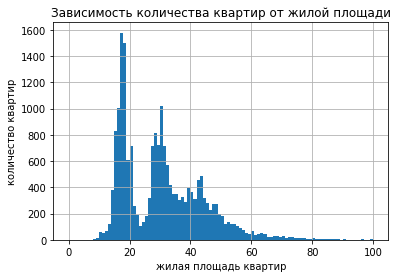

In [39]:
df['living_area'].hist(bins=100,  range=(0,100))
plt.title('Зависимость количества квартир от жилой площади')
plt.xlabel('жилая площадь квартир')
plt.ylabel('количество квартир');

Больше всего продают квартир с жилой площадью от 15 до 30 кв.м., при этом прослеживается спад в зоне 23-24 кв.м.

#### Площадь кухни

In [40]:
df['kitchen_area'].describe()

count    21638.000000
mean         9.386495
std          3.821444
min          1.300000
25%          6.800000
50%          8.800000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

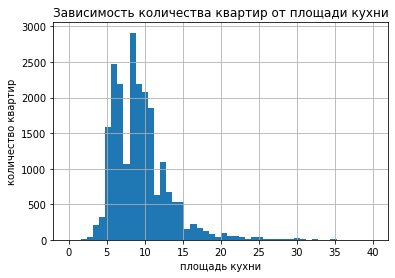

In [41]:
df['kitchen_area'].hist(bins=50, range=(0,40))
plt.title('Зависимость количества квартир от площади кухни')
plt.xlabel('площадь кухни')
plt.ylabel('количество квартир');

Больше всего предложений по размеру кухни 6 и 10 кв.м., при этом заметны всплески на всех целых значениях от 6 до 12 кв.м.

#### Количество комнат

In [42]:
df['rooms'].describe()

count    21638.000000
mean         1.930077
std          0.912070
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

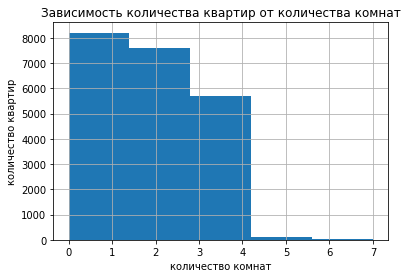

In [43]:
df['rooms'].hist(bins=5, range=(0,7))
plt.title('Зависимость количества квартир от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('количество квартир');

Больше всего однокомнатных квартир на рынке. С по вышением количества комнат предложений меньше.

#### Цена квартиры

In [44]:
df['last_price'].describe()

count    2.163800e+04
mean     4.839970e+06
std      2.217341e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.189440e+07
Name: last_price, dtype: float64

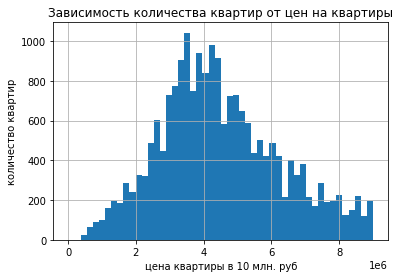

In [45]:
df['last_price'].hist(bins=50, range=(1.219000e+04,9.000000e+06))
plt.xlabel('цена квартиры в 10 млн. руб')
plt.ylabel('количество квартир')
plt.title('Зависимость количества квартир от цен на квартиры');

Чаще квартиры продаются по цене от 2 до 6 млн. рублей с пиком в 3.8 млн.

#### Высота потолков

In [46]:
df['ceiling_height'].describe()

count    21638.000000
mean         2.674597
std          0.218560
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

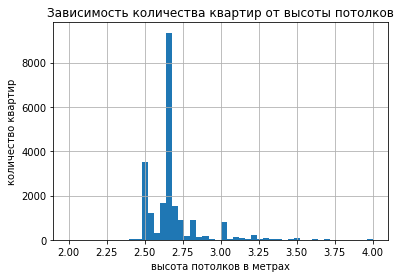

In [47]:
df['ceiling_height'].hist(bins=50, range=(2,4))
plt.xlabel('высота потолков в метрах')
plt.ylabel('количество квартир')
plt.title('Зависимость количества квартир от высоты потолков');

Подавляющее большинство квартир имеет потолки высотой 2.65 метра.

#### Тип этажа квартиры («первый», «последний», «другой»)

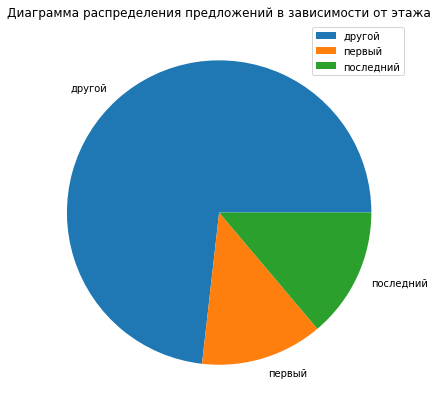

In [48]:
(df.pivot_table(index='floor_type',values='last_price',aggfunc='count')
  .plot.pie(y='last_price', figsize=(10,7), label=''
            , title='Диаграмма распределения предложений в зависимости от этажа')
)
plt.show();


На рынке меньше всего квартир расположенных на первом этаже, чуть больше квартир расположенных на последнем этаже. Квартиры расположенные между перым и последним этажами занимают 75% рынка.

#### Общее количество этажей в доме

In [49]:
df['floors_total'].describe()

count    21564.000000
mean        10.759136
std          6.641100
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

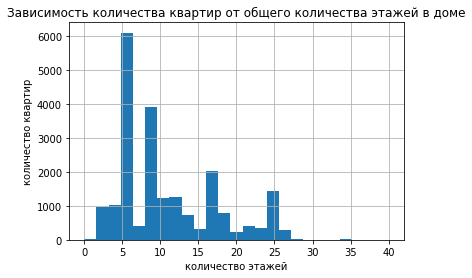

In [50]:
df['floors_total'].hist(bins=25, range=(0,40))
plt.xlabel('количество этажей')
plt.ylabel('количество квартир')
plt.title('Зависимость количества квартир от общего количества этажей в доме');

Больше всего предложений в пятиэтажных домах. Также наблюдается всплеск количества квартир в девятиэтажных домах.

#### Расстояние до центра города в метрах

In [51]:
df['city_centers_nearest'].describe()

count    16147.00000
mean     14978.49198
std       8560.16494
min        208.00000
25%      10602.00000
50%      13624.00000
75%      16722.00000
max      65968.00000
Name: city_centers_nearest, dtype: float64

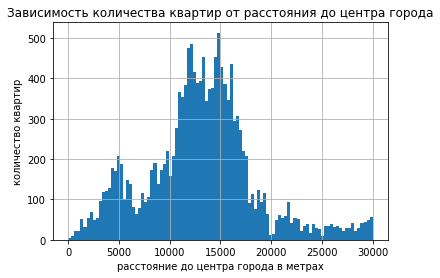

In [52]:
df['city_centers_nearest'].hist(bins=100,  range=(0,30000))
plt.xlabel('расстояние до центра города в метрах')
plt.ylabel('количество квартир')
plt.title('Зависимость количества квартир от расстояния до центра города');

Больше всего квартир находятся в 10-17 км от центра города.

#### Расстояние до ближайшего парка

In [53]:
df['parks_nearest'].describe()

count    6724.000000
mean      487.799227
std       326.507587
min         1.000000
25%       289.000000
50%       455.500000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

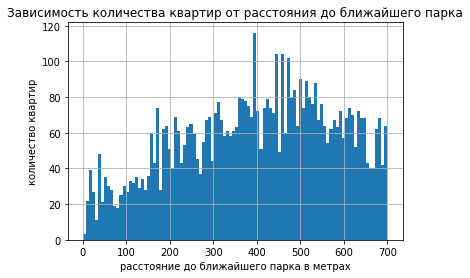

In [54]:
df['parks_nearest'].hist(bins=100, range=(0,700))
plt.xlabel('расстояние до ближайшего парка в метрах')
plt.ylabel('количество квартир')
plt.title('Зависимость количества квартир от расстояния до ближайшего парка');

Расстояние до парков никак не влияет на количество продаваемых квартир.

#### Общий вывод по разделу

Во время изучения зависимости количества квартир от разных параметров были сделаны следующие выводы:

1. Самое большое количество предложений квартир на рынке по общей жилой площади от 30 до 62 кв.м. Максимальное количество предложений - 42 кв.м.
2. Больше всего продают квартир с жилой площадью от 15 до 30 кв.м., при этом прослеживается спад в зоне 23-24 кв.м.
3. Больше всего предложений по размеру кухни 6 и 10 кв.м., при этом заметны всплески на всех целых значениях от 6 до 12 кв.м.
4. Больше всего однокомнатных квартир на рынке. С по вышением количества комнат предложений меньше.
5. Чаще квартиры продаются по цене от 2.5 до 6 млн. рублей с пиком в 4.2 млн.
6. Подавляющее большинство квартир имеет потолки высотой 2.65 метра.
7. На рынке меньше всего квартир расположенных на первом этаже, чуть больше квартир расположенных на последнем этаже. Квартиры расположенные между перым и последним этажами занимают 75% рынка.
8. Больше всего предложений в пятиэтажных домах. 
9. Больше всего квартир находятся в 10-17 км от центра города.
10. Расстояние до парков никак не влияет на количество продаваемых квартир.

### Изучите, как быстро продавались квартиры (столбец days_exposition)

In [55]:
df['days_exposition'].describe()

count    19001.000000
mean       173.210989
std        211.617082
min          1.000000
25%         44.000000
50%         91.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

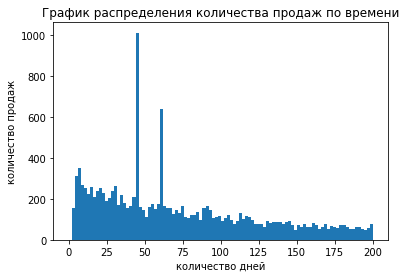

In [56]:
df['days_exposition'].plot(
    kind='hist', bins=100, range=(0, 200),
    title='График распределения количества продаж по времени')
plt.xlabel('количество дней')
plt.ylabel('количество продаж');

__Вывод__

Среднее время проажи квартир - 180 дней, в то время как медиальное - 95. Более правдивой цифрой кажется медиальное значение потому что оно менее подвеженое выбросам и нестандартным значениям. Исходя из этого можно сделать вывод что среднее время продажи квартир 3 месяца. Быстрыми можно считать продажи состоявшиеся за 45 дней, долгими в свою очередь можно назвать квартиры, которые стоят в продаже больше 232 дней. 
На графике так же видны всплески на 48 и 60 день. Возможно в эти дни квартиры снимались с продажи и выставлялись по новой.

### Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта

In [57]:
df.pivot_table(index='total_images', values=['last_price','total_area','living_area',
                                             'kitchen_area','rooms','publication_weekday',
                                             'publication_monts','publication_years']).corr()

,kitchen_area,last_price,living_area,publication_monts,publication_weekday,publication_years,rooms,total_area
kitchen_area,1.000000,0.716937,-0.132466,0.110709,-0.232599,-0.042949,-0.097630,0.399755
last_price,0.716937,1.000000,0.332086,-0.025719,-0.114338,0.107588,0.358365,0.697101
living_area,-0.132466,0.332086,1.000000,0.063315,0.142977,-0.052397,0.964972,0.839290
publication_monts,0.110709,-0.025719,0.063315,1.000000,0.041517,-0.863498,0.011846,0.056168
publication_weekday,-0.232599,-0.114338,0.142977,0.041517,1.000000,-0.075456,0.190053,0.017274
publication_years,-0.042949,0.107588,-0.052397,-0.863498,-0.075456,1.000000,0.003395,-0.019843
rooms,-0.097630,0.358365,0.964972,0.011846,0.190053,0.003395,1.000000,0.812280
total_area,0.399755,0.697101,0.839290,0.056168,0.017274,-0.019843,0.812280,1.000000


Корреляция по данным указывает, что цена от общей площади (ровно как и от площади кухни и жилой площади) и количества комат в квартире, в то время как от даты публикации корреляции почти нет.  
Проверим этот вывод сравнивая каждый из параметров с ценой квартир.

### Зависимость цены на квартиру от разных параметров

#### Зависимость цены на квартиру от общей площади

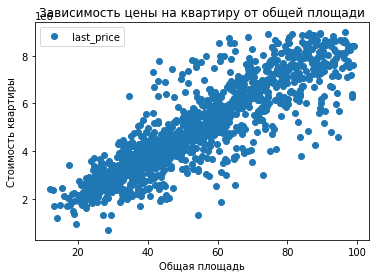

In [58]:
(
    df.pivot_table(index='total_area', values='last_price').
    query('total_area<100 & last_price<9.000000e+06').
    plot(title = 'Зависимость цены на квартиру от общей площади', 
         xlabel='Общая площадь', 
         ylabel='Стоимость квартиры', style='o')
);


#### Зависимость цены на квартиру от жилой площади

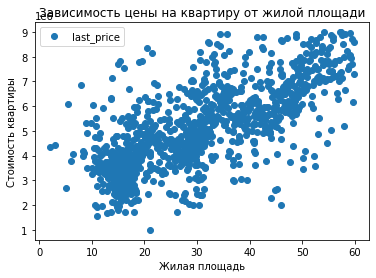

In [59]:
(
    df.pivot_table(index='living_area', values='last_price').
    query('living_area<60 & last_price<9.000000e+06').
    plot(title = 'Зависимость цены на квартиру от жилой площади', 
         xlabel='Жилая площадь', 
         ylabel='Стоимость квартиры', style='o')
);

#### Зависимость цены на квартиру от площади кухни

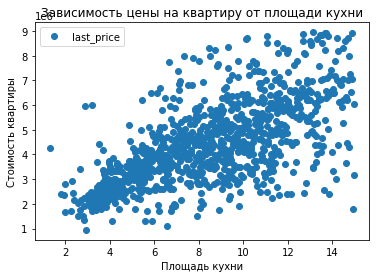

In [60]:
(
    df.pivot_table(index='kitchen_area', values='last_price').
    query('kitchen_area<15 & last_price<9.000000e+06').
    plot(title = 'Зависимость цены на квартиру от площади кухни', 
         xlabel='Площадь кухни', 
         ylabel='Стоимость квартиры', style='o')
);

#### Зависимость цены на квартиру от количества комнат

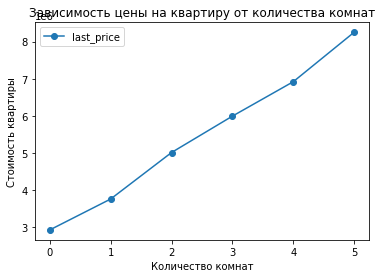

In [61]:
(
    df.pivot_table(index='rooms', values='last_price').
    query('rooms<6 & last_price<9.000000e+06').
    plot(title = 'Зависимость цены на квартиру от количества комнат', 
         xlabel='Количество комнат', 
         ylabel='Стоимость квартиры', style='o-')
);

#### Зависимость цены на квартиру от типа этажа

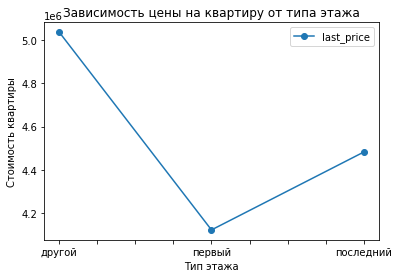

In [62]:
(
    df.pivot_table(index='floor_type', values='last_price').    
    plot(title = 'Зависимость цены на квартиру от типа этажа', 
         xlabel='Тип этажа', 
         ylabel='Стоимость квартиры', style='o-')
);

#### Зависимость цены на квартиру от дня недели

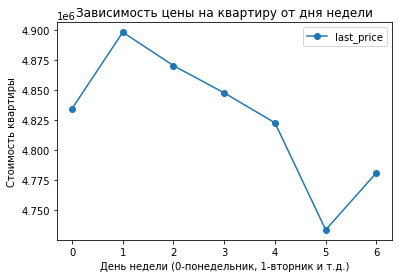

In [63]:
(
    df.pivot_table(index='publication_weekday', values='last_price').
    query('last_price<9.000000e+06').
    plot(title = 'Зависимость цены на квартиру от дня недели', 
         xlabel='День недели (0-понедельник, 1-вторник и т.д.)', 
         ylabel='Стоимость квартиры', style='o-')
);

#### Зависимость цены на квартиру от месяца

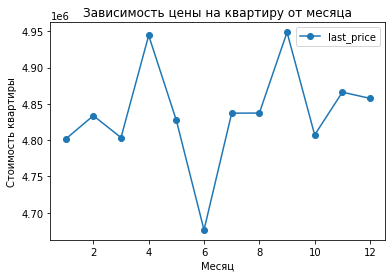

In [64]:
(
    df.pivot_table(index='publication_monts', values='last_price').
    query('last_price<9.000000e+06').
    plot(title = 'Зависимость цены на квартиру от месяца', 
         xlabel='Месяц', 
         ylabel='Стоимость квартиры', style='o-')
);

#### Зависимость цены на квартиру от года

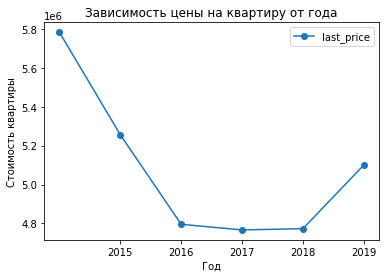

In [65]:
(
    df.pivot_table(index='publication_years', values='last_price').
    query('last_price<9.000000e+06').
    plot(title = 'Зависимость цены на квартиру от года', 
         xlabel='Год', 
         ylabel='Стоимость квартиры', style='o-')
)
plt.xticks(range(2015, 2020));

Предварительный вывод подствердился. Чем больше площадь (а так же кухни и жилой зоны) и больше комнат в квартире тем выше цена. День, месяц и год публикации квартиры никаким образом не сказываются на цене квартиры.  
На первых и последних этажах в среднем цены ниже, чем на остальных этажах.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [66]:
local_name = df.pivot_table(index='locality_name', 
                            values='last_price', 
                            aggfunc='count').sort_values(by='last_price', ascending=False)
local_name.columns = ['count']
local_name['squire_meter_price'] = df.pivot_table(index='locality_name', values='squire_meter_price').round(2)
local_name.head(10)

,count,squire_meter_price
locality_name,,
санкт-петербург,13737,105425.27
мурино,590,86087.51
кудрово,470,95152.07
шушары,440,78677.36
всеволожск,397,67214.25
пушкин,338,100290.60
колпино,336,75185.48
парголово,327,90175.91
гатчина,305,68421.90


__Вывод__

Наибольшая стоимость квартир в Санкт-Петербурге, далее идет Мурино и Кудрово. Скорее всего это связано с хорошей инфраструктурой в этих районах и большим количеством парков и прудов. В конце списка Выборг, Гатчина и Парголово, которые находятся на большом удалении от крупных городов и имеют низкое население и менее развитую инфраструктуру в сравнении с лидерами по продажи квартир.

### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра

In [67]:
df.query('locality_name == "санкт-петербург"')['center_distance'].describe()

count    13695.000000
mean        12.231471
std          4.599597
min          0.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         29.000000
Name: center_distance, dtype: float64

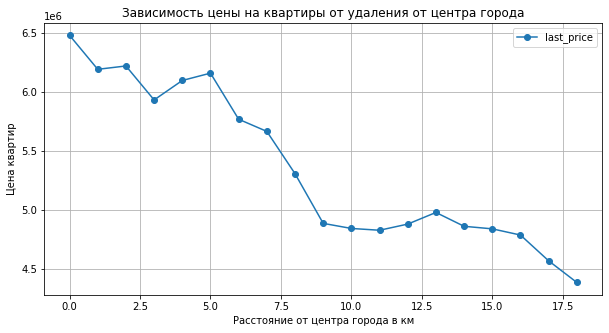

,last_price
center_distance,
0.0,"8,398,000.0"
1.0,"8,145,277.2"
2.0,"7,970,519.3"
3.0,"7,346,575.4"
4.0,"7,606,618.3"
5.0,"7,661,224.9"
6.0,"7,108,233.8"
7.0,"6,635,321.1"
8.0,"6,617,244.4"


In [68]:
(
    df.query('locality_name == "санкт-петербург" & last_price<8.000000e+06 & center_distance<19')
    .pivot_table(index='center_distance', values='last_price')
    .plot(grid=True, style='o-', figsize=(10,5))
)

plt.title('Зависимость цены на квартиры от удаления от центра города')
plt.xlabel('Расстояние от центра города в км')
plt.ylabel('Цена квартир')
plt.show()
pd.options.display.float_format = '{:,.1f}'.format
(
    df.query('locality_name == "санкт-петербург" & center_distance<20').
    pivot_table(index='center_distance', values='last_price')
    
)


__Вывод__

Самая высокая стоимость квартир в центре и их стоимость уменьшается с увеличением расстояния.

## Напишите общий вывод

В процессе исследования объявлений о продаже квартир были выполнены следующие этапы и сделаны выводы по ним:

1. Всего в таблице 23699 записей. Почти во всех столбцах встречаются пустые значения. В некоторых столбцах указан неверный тип данных.
2. В ходе выполнения предобработки были найдены и заполнены пустные значения в следующих столбцах:
        * Сelling_height - высота потолков. Пустые значения были заполнены медиальными.
        * floors_total - общее количество этажей в доме. Так же были заполнены медиальными значениями.
        * is_apartment - тип квартиры. Помимо пропущенных значений столбец так же содержит значения true и false. Скорее всего пустые значения указывают на то, что квартиры не являются апартаментами, значит заполним их как false.
        * kitchen_area - площадь кухни. При проверке выяснилось что нет никакой зависимости этой величины от других. Скорее всего это связано с тем что в квартирах нет четко выделенной площади кухни. Пустые значения было принято заполнить нулями.
        * balcony - былконы. Пустные значения скорее всего не заполнили из-за того что в квартирах нет балконов. Пустые значения были заполнены нулями.
        * locality_name - место где находится квартира. Из-за того что точно неизвестно где располагается квартира было принято регение заполнить пустные значение как unknown.
        * parks_around3000 и ponds_around3000 это количество парков и пркдов сообтветственно. Скорее всего пустые значения появились из-за того что в радиусе 3 км от квартиры нет ни парков, ни прудов. Пустные значения были заполнены нулями.
    Некоторые данные пришлось оставить без изменений:
        * living_area - жилая площадь. Так как жилая площадь это общая площадь квартиры без учета нежилых зон (балкона, кухни, коридора и т.п) было принято решение оставить все значения без изменений чтобы избежать искажения данных.
        * airports_nearest, city_centers_nearest, parks_nearest и ponds_nearest. Скорее всего пустые данные указывают на слишком большое удаление от того или инного места. Чтобы избежать искажения данных было принято решение оставить столбцы без изменений.
        * days_exposition - количество дней в продаже. Скорее всего пустые значения указывают на то, что квартира еще не продана, поэтому было принято решение оставить все как есть.
    Причиной пропусков могли стать человеческий фактор или несовершенность програмной оболочки (не все поля обязательные или нет проверки введенных данных).  
    Также кроме заполнения пропусков были изменены типы данных в некоторых столбцах для более удобной работы с даннымии переименован столбец cityCenters_nearest в city_centers_nearest.  
    Были устраныне неявные дубликаты в названиях населенных пунктов (locality_name). 
    
    
3. Добавлены новые столбцы в таблицу:
        * squire_meter_price - цена квадратного метра.
        * publication_weekday - день публикации.
        * publication_monts - месяц публикации.
        * publication_years - год публикации.
        * floor_type - тип этажа ("первый", "другой", "последний").
        * center_distance - расстояние от центра города в километрах.
4. Проведен исследовательский анализ данных:  

    4.1. Изучены и описаны зависимости количества квартир от разных параметров:
        * Самое большое количество предложений квартир на рынке по общей жилой площади от 30 до 62 кв.м. Максимальное количество предложений - 42 кв.м.
        * Больше всего продают квартир с жилой площадью от 15 до 30 кв.м., при этом прослеживается спад в зоне 23-24 кв.м.
        * Больше всего предложений по размеру кухни 6 и 10 кв.м., при этом заметны всплески на всех целых значениях от 6 до 12 кв.м.
        * Больше всего однокомнатных квартир на рынке. С по вышением количества комнат предложений меньше.
        * Чаще квартиры продаются по цене от 2.5 до 6 млн. рублей с пиком в 4.2 млн.
        * Подавляющее большинство квартир имеет потолки высотой 2.6 метра.
        * На рынке меньше всего квартир расположенных на первом этаже, чуть больше квартир расположенных на последнем этаже. Квартиры расположенные между перым и последним этажами занимают 75% рынка.
        * Больше всего предложений в пятиэтажных домах. 
        * Больше всего квартир находятся в 10-17 км от центра города.
        * Расстояние до парков никак не влияет на количество продаваемых квартир.
    4.2. Изучено как быстро продавались квартиры:
        * Среднее время проажи квартир - 180 дней, в то время как медиальное - 95, что является для нас более показательно, потому что менее подвержено выбросам и нестандартным значениям. 
        * Среднее время продажи квартир 3 месяца. Быстрыми можно считать продажи состоявшиеся за 45 дней, долгими в свою очередь можно назвать квартиры, которые стоят в продаже больше 232 дней. 
    4.3. Определены факторы влияющие на цену квартир:
        * Чем выше общая площадь квартиры, а так же количество комнат, тем выше её цена.
        * Чем выше квартира в доме, тем больше она стоит. Квартиры на 1 этаже имеют наименьшую стоимость, в то время как квартиры на последнем этаже наоборот самую большую.
    4.4. Посчитана цена квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений:
        * Наибольшая стоимость квартир в Санкт-Петербурге, далее идет Мурино и Кудрово. Скорее всего это связано с хорошей инфраструктурой в этих районах и большим количеством парков и прудов. В конце списка Выборг, Гатчина и Парголово, которые находятся на большом удалении от крупных городов и имеют низкое население и менее развитую инфраструктуру в сравнении с лидерами по продажи квартир.
    4.5. Вычислена средняя стоимость квартиры на разном удалении от центра Санкт-Петербурга:
        * Самая высокая стоимость квартир в центре и их стоимость уменьшается с увеличением расстояния.
        
    